# Decision Tree

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [64]:
dataset = pd.read_csv(r"C:\Users\conte\Downloads\Social_Network_Ads.csv")

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [66]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [67]:
dataset.size

2000

In [68]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [69]:
x = dataset.iloc[:,-2:]

In [70]:
x

,EstimatedSalary,Purchased
0,19000,0
1,20000,0
2,43000,0
3,57000,0
4,76000,0
...,...,...
395,41000,1
396,23000,1
397,20000,1
398,33000,0


In [71]:
y = dataset["Purchased"]

In [72]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
sc = StandardScaler()

In [75]:
sc.fit(x)

StandardScaler()

In [76]:
sc.transform(x)

array([[-1.49004624, -0.74593581],
       [-1.46068138, -0.74593581],
       [-0.78528968, -0.74593581],
       [-0.37418169, -0.74593581],
       [ 0.18375059, -0.74593581],
       [-0.34481683, -0.74593581],
       [ 0.41866944, -0.74593581],
       [ 2.35674998,  1.34059793],
       [-1.07893824, -0.74593581],
       [-0.13926283, -0.74593581],
       [ 0.30121002, -0.74593581],
       [-0.52100597, -0.74593581],
       [ 0.47739916, -0.74593581],
       [-1.51941109, -0.74593581],
       [ 0.35993973, -0.74593581],
       [ 0.30121002, -0.74593581],
       [-1.3138571 ,  1.34059793],
       [-1.28449224,  1.34059793],
       [-1.22576253,  1.34059793],
       [-1.19639767,  1.34059793],
       [-1.40195167,  1.34059793],
       [-0.60910054,  1.34059793],
       [-0.84401939,  1.34059793],
       [-1.40195167,  1.34059793],
       [-1.37258681,  1.34059793],
       [-1.46068138,  1.34059793],
       [-1.22576253,  1.34059793],
       [-1.16703281,  1.34059793],
       [-0.78528968,

In [77]:
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [78]:
x

,EstimatedSalary,Purchased
0,-1.490046,-0.745936
1,-1.460681,-0.745936
2,-0.785290,-0.745936
3,-0.374182,-0.745936
4,0.183751,-0.745936
...,...,...
395,-0.844019,1.340598
396,-1.372587,1.340598
397,-1.460681,1.340598
398,-1.078938,-0.745936


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt = DecisionTreeClassifier()

In [83]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [84]:
dt.score(x_test,y_test)*100

100.0

In [85]:
from sklearn.tree import plot_tree

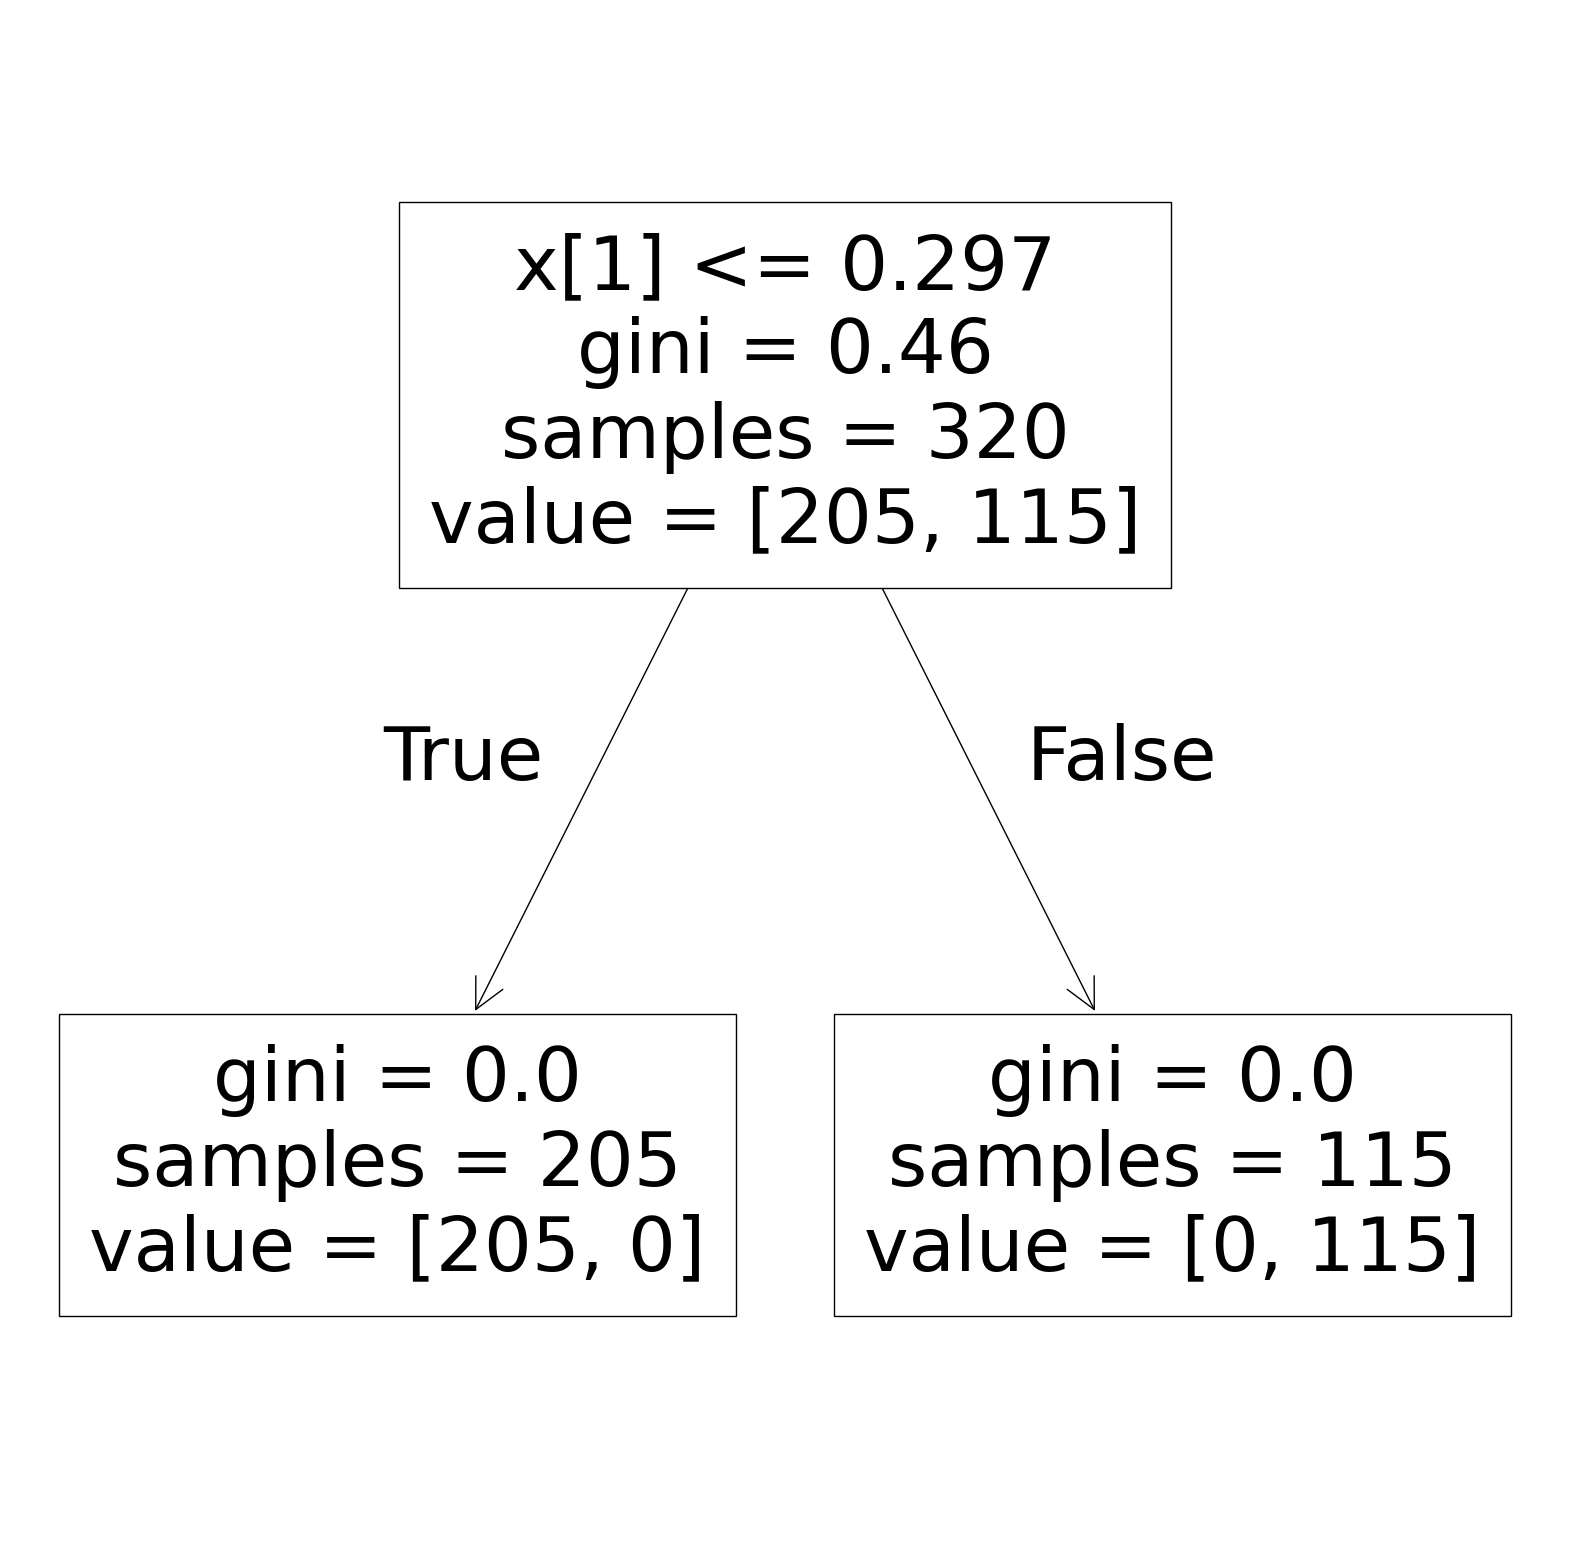

In [86]:
plt.figure(figsize=(20,20))
plot_tree(dt)
plt.show()

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

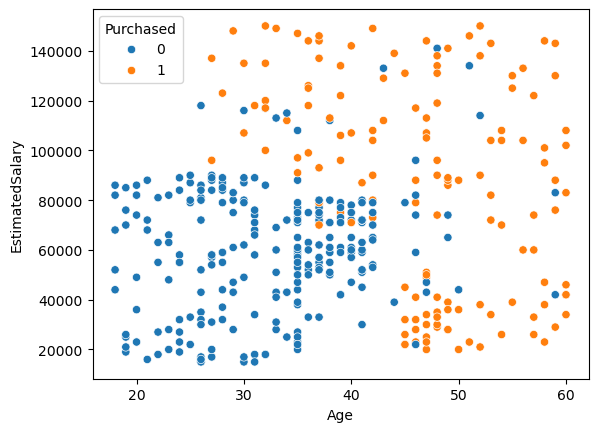

In [87]:
sns.scatterplot(x = 'Age' , y = 'EstimatedSalary' , data=dataset , hue = 'Purchased')

C:\Users\conte\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


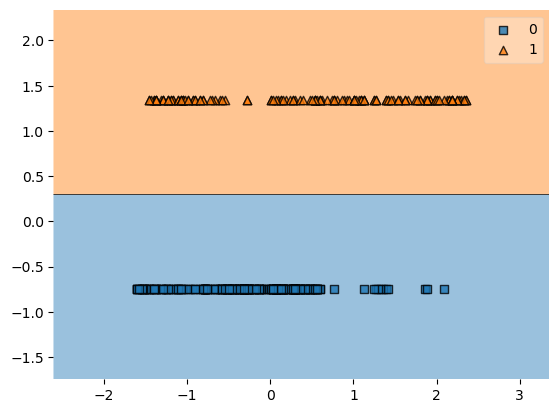

In [90]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()